In [23]:
%pip install pycaret

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
import pandas as pd

df = pd.read_excel("C:\\Users\\opoobet\\Desktop\\AJCHECK CODE\\Segmentation\\customer_feature.xlsx")

In [26]:
df = df.fillna(0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223911 entries, 0 to 223910
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ent             223911 non-null  object        
 1   first_date      223911 non-null  datetime64[ns]
 2   last_date       223911 non-null  datetime64[ns]
 3   total_qty       223911 non-null  int64         
 4   total_amt       223911 non-null  int64         
 5   no.visit        223911 non-null  int64         
 6   basket_size     223911 non-null  float64       
 7   join_date       223911 non-null  object        
 8   no.join_year    223911 non-null  int64         
 9   visit_period    223911 non-null  int64         
 10  MTBP            223911 non-null  int64         
 11  order_size      223911 non-null  float64       
 12  visit_size      223911 non-null  float64       
 13  no.center       223911 non-null  int64         
 14  ARPU            223911 non-null  flo

In [28]:
df.describe()

,total_qty,total_amt,no.visit,basket_size,no.join_year,visit_period,MTBP,order_size,visit_size,no.center,ARPU,trans_online,trans_offline,CLTV,trans_price_Q1,trans_price_Q2,trans_price_Q3,trans_price_Q4,no.end_under
count,223911.000000,2.239110e+05,223911.000000,2.239110e+05,223911.000000,223911.000000,223911.000000,2.239110e+05,223911.000000,223911.000000,2.239110e+05,223911.000000,223911.000000,2.239110e+05,223911.000000,223911.000000,223911.000000,223911.000000,223911.00000
mean,7.020267,2.658955e+06,2.583098,5.135501e+05,33.479231,96.242092,21.509426,1.254300e+06,3.080233,1.581177,1.254300e+06,0.523583,0.503510,5.650442e+08,0.286588,0.296723,0.223971,0.192718,0.51269
std,24.622839,3.341269e+06,3.245479,3.622989e+05,53.771785,189.150729,46.529481,6.333232e+05,2.542635,1.260799,6.333232e+05,0.450342,0.448672,3.415321e+08,0.260764,0.284157,0.272833,0.286587,3.37751
min,1.000000,2.500000e+03,1.000000,2.500000e+03,1.000000,0.000000,0.000000,2.500000e+03,1.000000,1.000000,2.500000e+03,0.000000,0.000000,5.450000e+05,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,1.565000e+06,1.000000,2.861667e+05,1.000000,0.000000,0.000000,7.725000e+05,1.750000,1.000000,7.725000e+05,0.000000,0.000000,3.181908e+08,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.000000,1.675000e+06,1.000000,4.112368e+05,2.000000,0.000000,0.000000,1.364667e+06,2.500000,1.000000,1.364667e+06,0.500000,0.500000,5.253425e+08,0.250000,0.250000,0.125000,0.000000,0.00000
75%,7.000000,2.201000e+06,3.000000,5.875000e+05,124.000000,33.000000,13.000000,1.659000e+06,4.000000,2.000000,1.659000e+06,1.000000,1.000000,7.687680e+08,0.500000,0.500000,0.400000,0.333333,0.00000
max,9910.000000,9.613300e+07,63.000000,2.579000e+06,124.000000,729.000000,363.000000,1.623700e+07,206.458333,27.000000,1.623700e+07,1.000000,1.000000,1.042949e+10,1.000000,1.000000,1.000000,1.000000,916.00000


In [29]:
# Drop column
df_features = df.drop(['ent'], axis=1)
df_features = df_features.drop(['first_date'], axis=1)
df_features = df_features.drop(['last_date'], axis=1)
df_features = df_features.drop(['join_date'], axis=1)

In [30]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223911 entries, 0 to 223910
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   total_qty       223911 non-null  int64  
 1   total_amt       223911 non-null  int64  
 2   no.visit        223911 non-null  int64  
 3   basket_size     223911 non-null  float64
 4   no.join_year    223911 non-null  int64  
 5   visit_period    223911 non-null  int64  
 6   MTBP            223911 non-null  int64  
 7   order_size      223911 non-null  float64
 8   visit_size      223911 non-null  float64
 9   no.center       223911 non-null  int64  
 10  ARPU            223911 non-null  float64
 11  trans_online    223911 non-null  float64
 12  trans_offline   223911 non-null  float64
 13  CLTV            223911 non-null  float64
 14  trans_price_Q1  223911 non-null  float64
 15  trans_price_Q2  223911 non-null  float64
 16  trans_price_Q3  223911 non-null  float64
 17  trans_pric

In [31]:
# Standardize the features
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

## Find the optimal number of clusters

Elbow Method to determine the number of clusters to be formed:


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

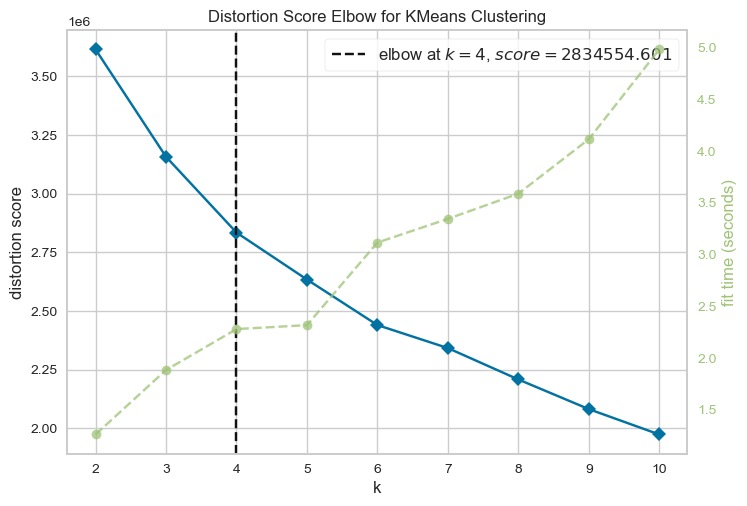

In [32]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=158), k=10, scoere='calinski_harabasz')
Elbow_M.fit(df_features_scaled)
Elbow_M.show();

For n_clusters = 2 The average silhouette_score is: 0.1684399337861414
For n_clusters = 3 The average silhouette_score is: 0.16568356935390577
For n_clusters = 4 The average silhouette_score is: 0.17690141509085397
For n_clusters = 5 The average silhouette_score is: 0.18792042278639262
For n_clusters = 6 The average silhouette_score is: 0.19824166482892083
For n_clusters = 7 The average silhouette_score is: 0.18512093178566197


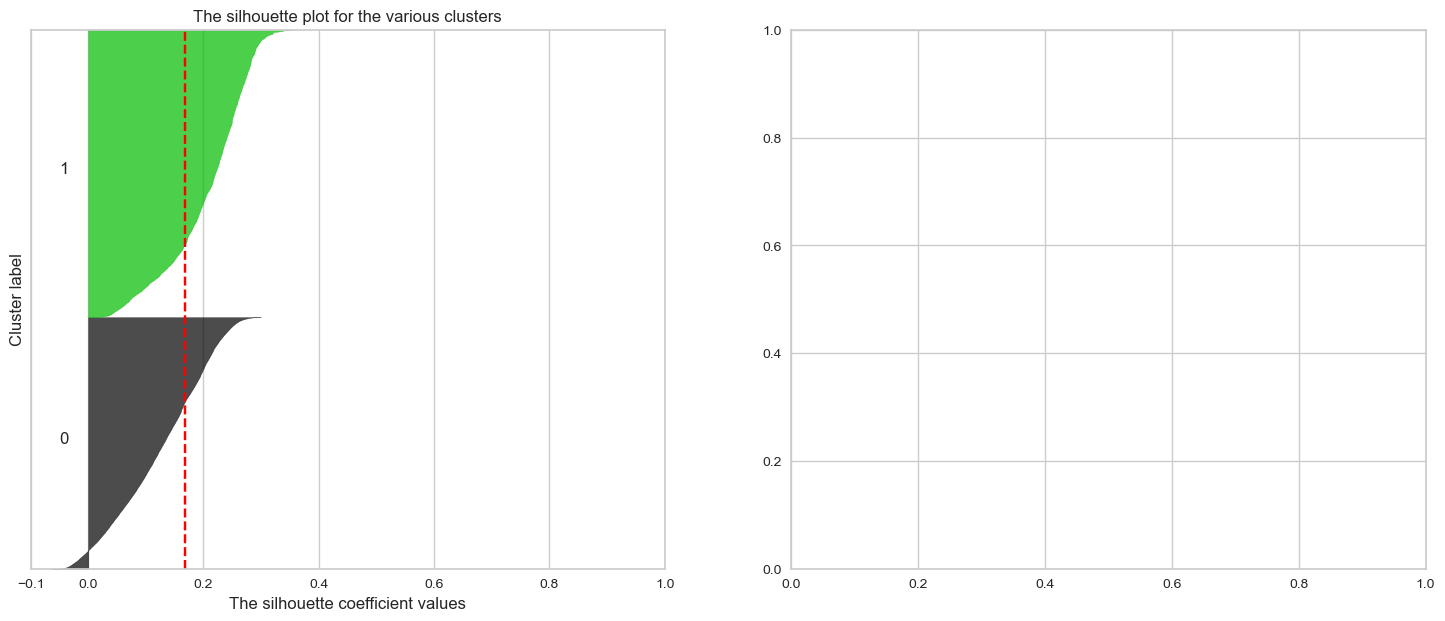

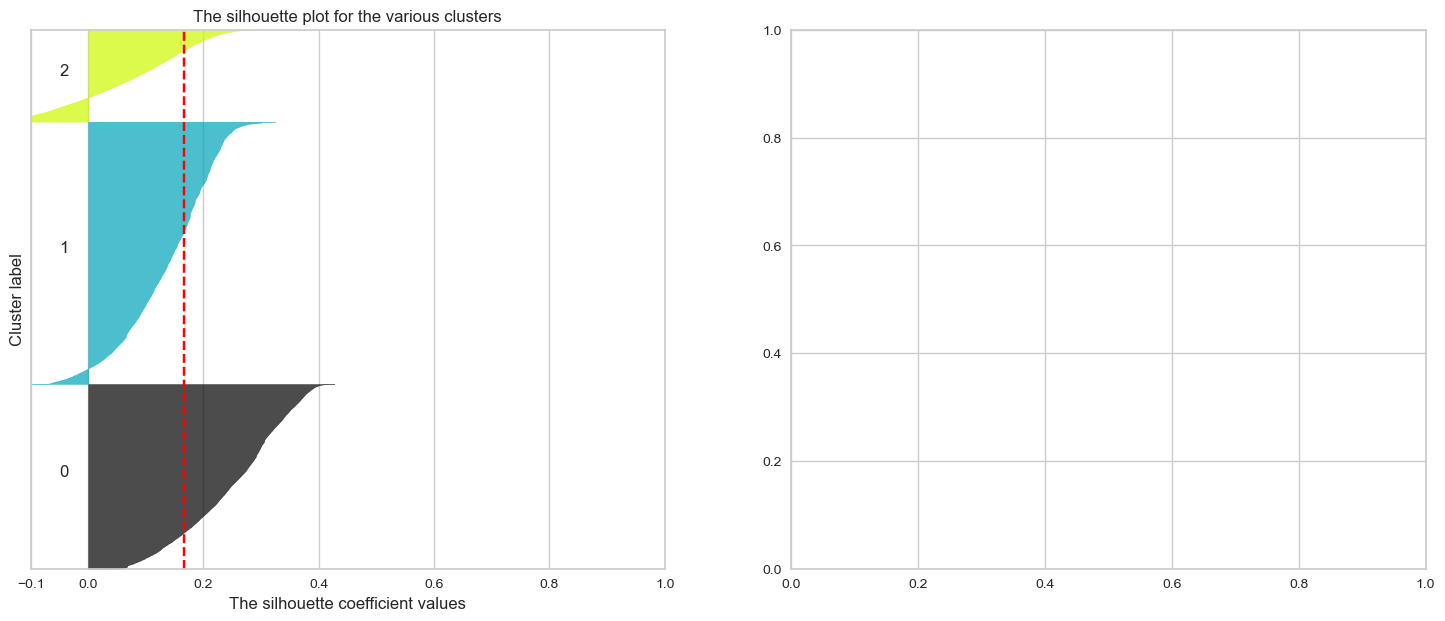

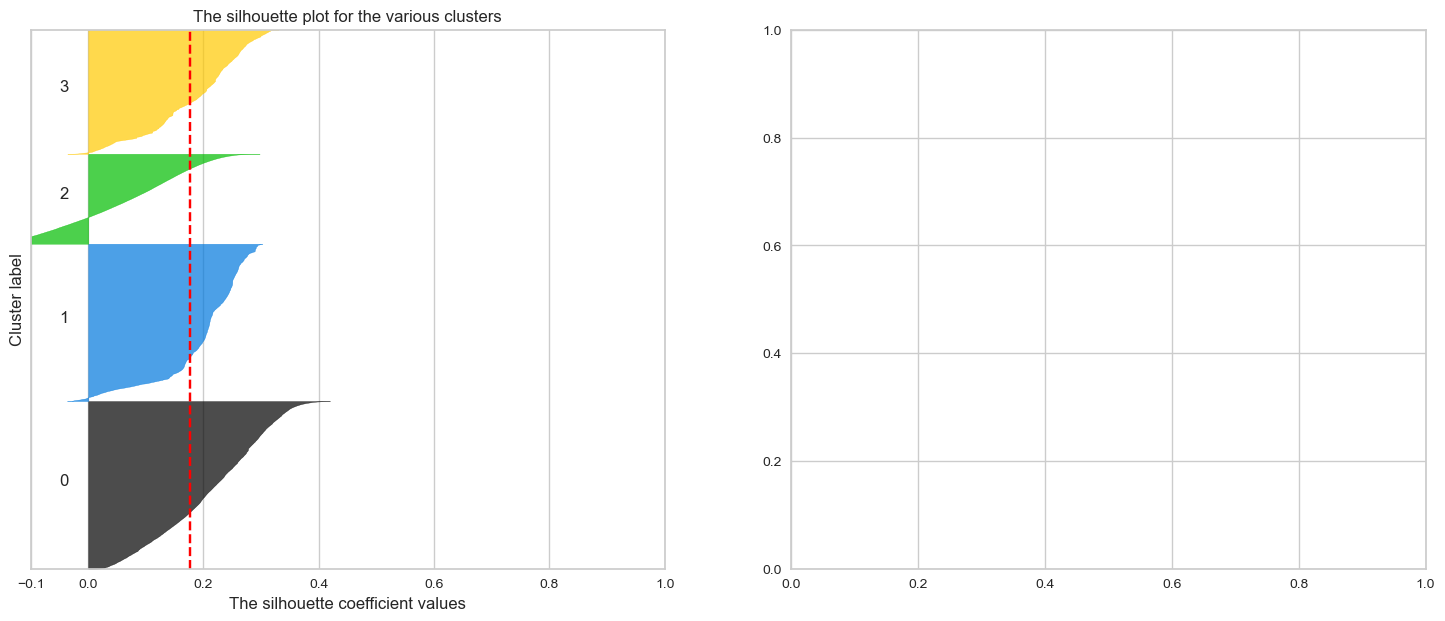

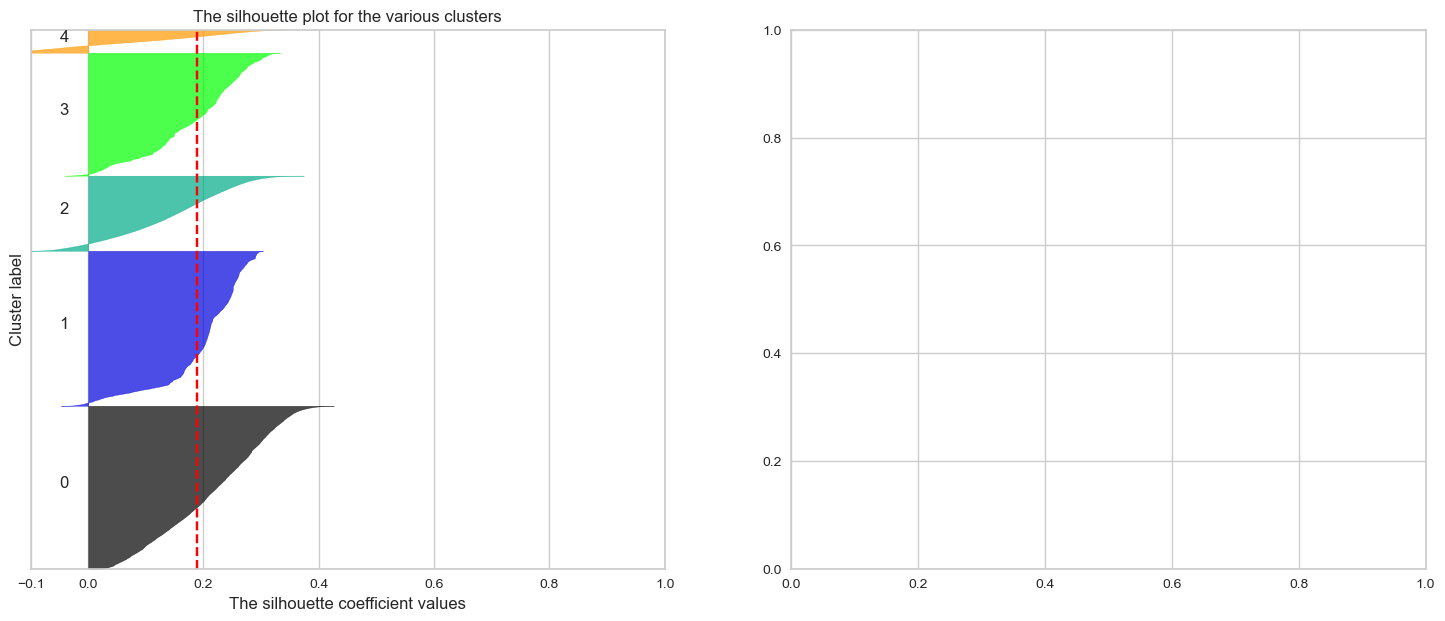

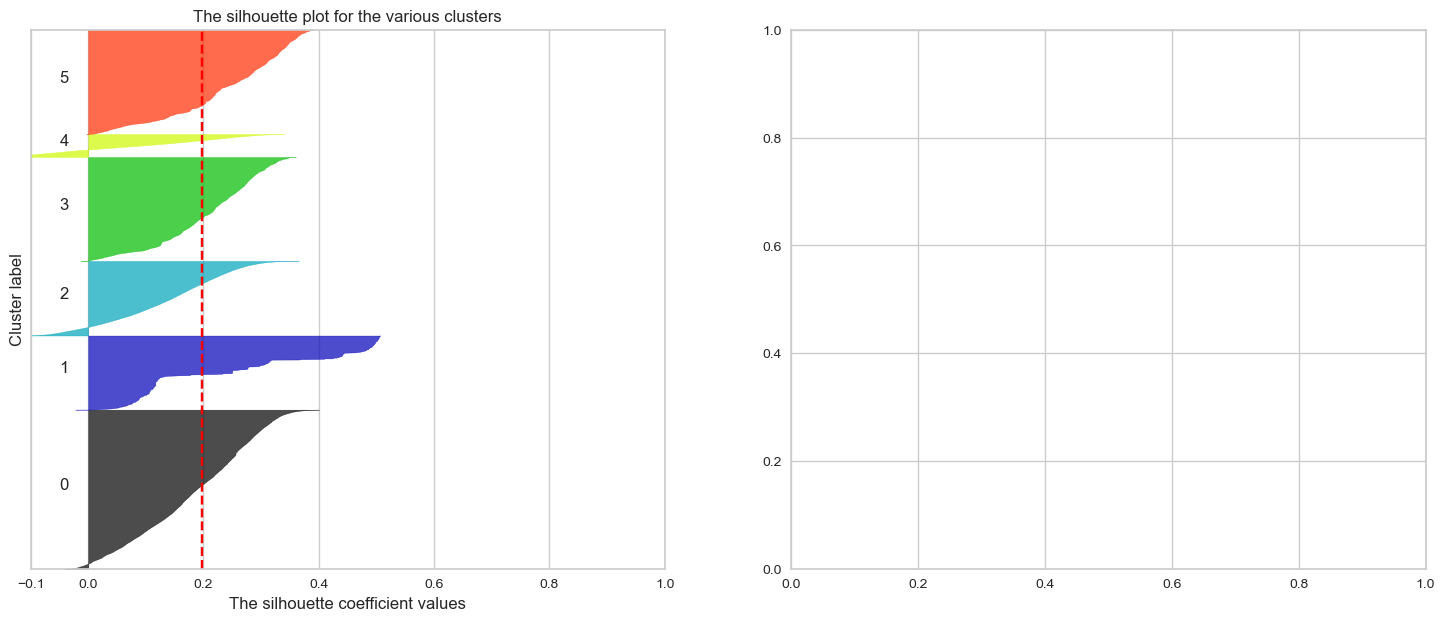

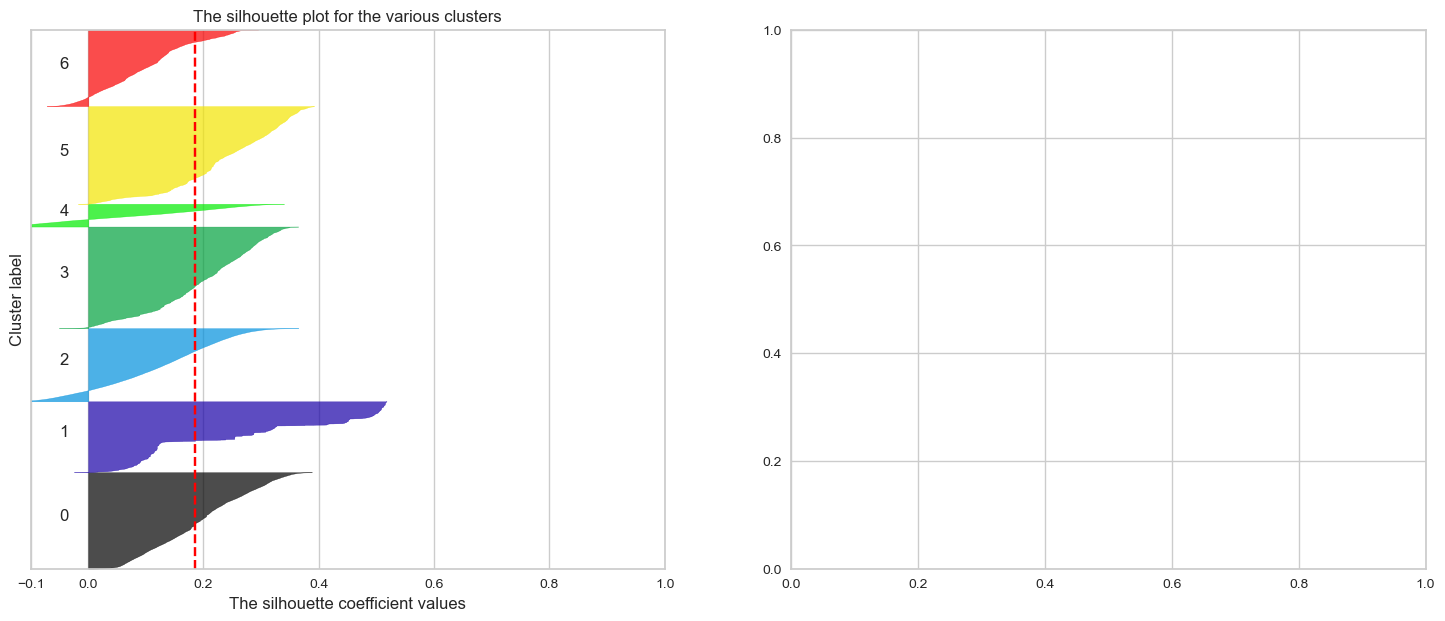

In [33]:
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

# Generating the sample data
X = df_features_scaled
n_samples, n_features = X.shape
centers = 4
cluster_std = 1

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1 to 1, but in this example, all
    # values lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the y-axis labels/ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters formed
    colors = cm


## Fit & Predict the model

In [34]:
# Initiating the K-means Clustering model
KM = KMeans(n_clusters=4, random_state=666)

In [35]:
# Fit model and predict clusters
yhat_KM = KM.fit_predict(df_features_scaled)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
# create a new column in the scaled dataframe with the cluster labels
df_features_scaled = pd.DataFrame(df_features_scaled, columns=df_features.columns)
df_features_scaled["Clusters"] = pd.Series(yhat_KM, index=df_features_scaled.index)

In [37]:
# Adding the Clusters feature to the original dataframe.
df["Clusters"] = df_features_scaled["Clusters"]

In [38]:
# calculate Silhouette Coefficient
score = silhouette_score(df_features_scaled, yhat_KM)
print(f"For k=4, the Silhouette Coefficient is {score:.2f}")

For k=4, the Silhouette Coefficient is 0.23


## Principle Component Analysis

In [39]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(df_features_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_features_scaled), columns=(["PC1","PC2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,223911.0,-8.885315e-17,2.045616,-2.639494,-1.124345,-0.574376,0.008693,95.777711
PC2,223911.0,7.971396e-17,1.963856,-4.961277,-1.625740,0.460336,1.399297,34.296799


In [40]:
PCA_ds["Clusters"] = yhat_KM

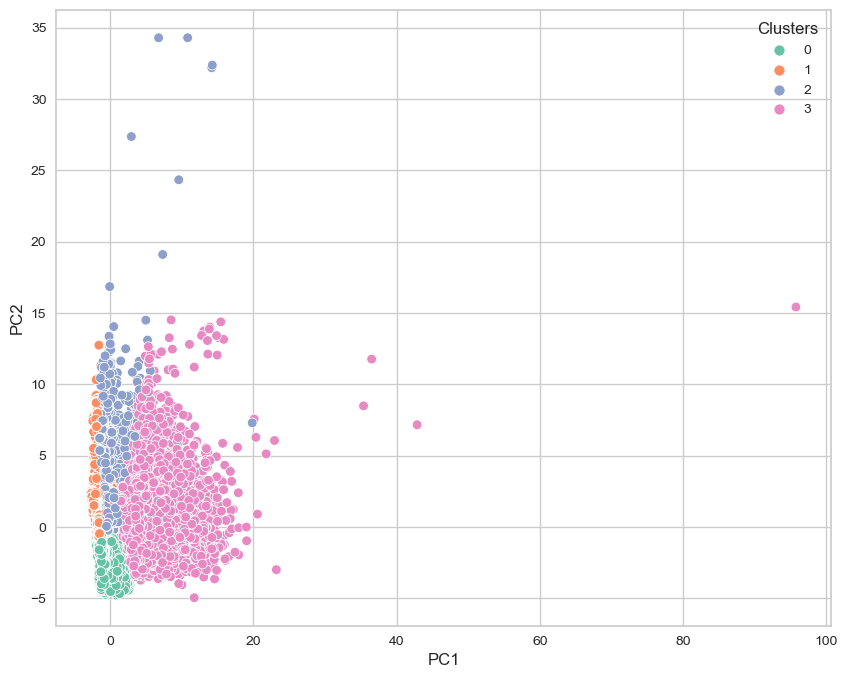

In [41]:
# Plot the clusters on reduced dimension data
plt.figure(figsize=(10,8))
sns.scatterplot(x="PC1", y="PC2", hue="Clusters", data=PCA_ds, palette="Set2")
plt.show()

## Export Train Result

In [42]:
cluster_results = df

In [43]:
cluster_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223911 entries, 0 to 223910
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ent             223911 non-null  object        
 1   first_date      223911 non-null  datetime64[ns]
 2   last_date       223911 non-null  datetime64[ns]
 3   total_qty       223911 non-null  int64         
 4   total_amt       223911 non-null  int64         
 5   no.visit        223911 non-null  int64         
 6   basket_size     223911 non-null  float64       
 7   join_date       223911 non-null  object        
 8   no.join_year    223911 non-null  int64         
 9   visit_period    223911 non-null  int64         
 10  MTBP            223911 non-null  int64         
 11  order_size      223911 non-null  float64       
 12  visit_size      223911 non-null  float64       
 13  no.center       223911 non-null  int64         
 14  ARPU            223911 non-null  flo

In [44]:
sku_count = cluster_results.groupby('Clusters')['CUST_CODE'].nunique()
print(sku_count)

KeyError: 'Column not found: CUST_CODE'

In [ ]:
cluster_results.to_excel('C:\Users\opoobet\Desktop\AJCHECK CODE\Segmentation\Customer_ClusterResult.xlsx', index=False)